In [1]:
#%matplotlib widget
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

In [2]:
# import numpy as np
# import glob
# for N_trees in list(np.arange(25,201,2)):
#     files = glob.glob(kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_*.pickle')
#     #print(N_trees,files)
#     if len(files)>0:
#         plt.figure()
#         for f in files:
#             #if ('seed90' in f) or ('seed92' in f) or ('seed91' in f):
#             dat = kgs.dill_load(f)
#             if dat.seed not in [114,115,116,117,118,119,140,141]:
#                 continue    
#             plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=dat.seed)
#         plt.title(f'N_trees={N_trees}')
#         plt.legend()
#         plt.xlabel('Number of generations')
#         plt.ylabel('Score (before legalize)')
#         plt.grid()
#         #plt.xlim(0,200)
#         plt.pause(0.001)
        

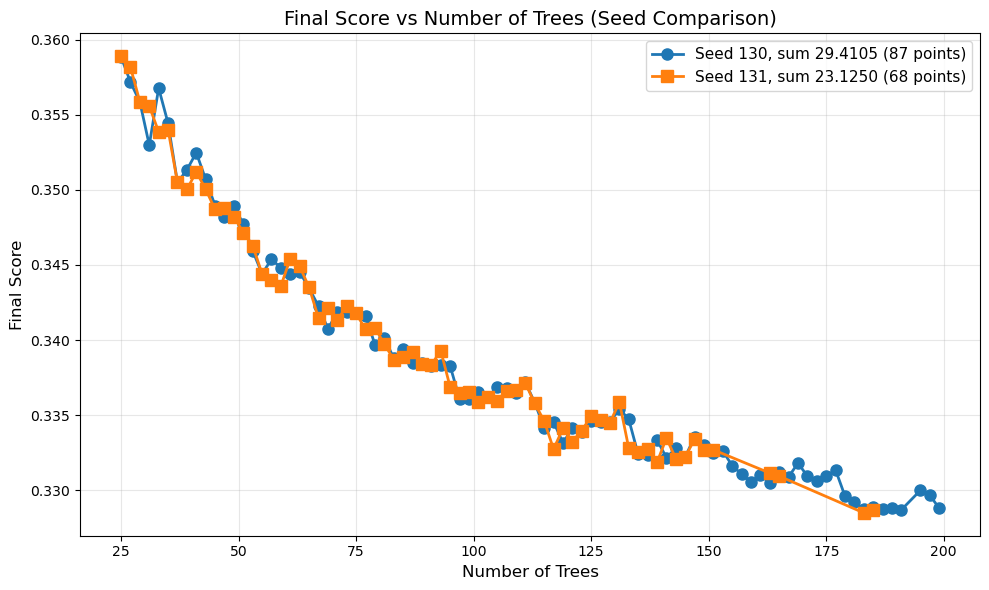

Plotted 87 total N_trees values: [np.int64(25), np.int64(27), np.int64(29), np.int64(31), np.int64(33), np.int64(35), np.int64(37), np.int64(39), np.int64(41), np.int64(43), np.int64(45), np.int64(47), np.int64(49), np.int64(51), np.int64(53), np.int64(55), np.int64(57), np.int64(59), np.int64(61), np.int64(63), np.int64(65), np.int64(67), np.int64(69), np.int64(71), np.int64(73), np.int64(75), np.int64(77), np.int64(79), np.int64(81), np.int64(83), np.int64(85), np.int64(87), np.int64(89), np.int64(91), np.int64(93), np.int64(95), np.int64(97), np.int64(99), np.int64(101), np.int64(103), np.int64(105), np.int64(107), np.int64(109), np.int64(111), np.int64(113), np.int64(115), np.int64(117), np.int64(119), np.int64(121), np.int64(123), np.int64(125), np.int64(127), np.int64(129), np.int64(131), np.int64(133), np.int64(135), np.int64(137), np.int64(139), np.int64(141), np.int64(143), np.int64(145), np.int64(147), np.int64(149), np.int64(151), np.int64(153), np.int64(155), np.int64(157),

In [3]:
# Compare final scores across multiple seeds
#SEEDS_TO_DO = [87,89,90, 91, 92,114,115,116,117,118,119,120,121,122,123,130,131]
#SEEDS_TO_DO = [87,89,90, 91, 92,114,115,116,117,118,119,120,121,122,123,130,131,800]
#SEEDS_TO_DO = [80,81,82,83,84,85,86,87,130,131,800]
SEEDS_TO_DO = [130,131]
#SEEDS_TO_DO = [110,111]

import numpy as np
import glob
import matplotlib.pyplot as plt
import re

# Collect final scores for each seed
seed_scores = {seed: {} for seed in SEEDS_TO_DO}

for N_trees in np.arange(25,201,2):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    
    for f in files:
        # Extract seed from filename using precise matching
        seed = None
        # Use regex to extract the seed number precisely
        seed_match = re.search(r'seed(\d+)', f)
        if seed_match:
            parsed_seed = int(seed_match.group(1))
            if parsed_seed in SEEDS_TO_DO:
                seed = parsed_seed
        
        if seed is not None:
            # Load data and get final score
            dat = kgs.dill_load(f)
            final_score = dat.ga.champions[0].phenotype.h[0,0].get()**2/N_trees  # Last generation's best cost
            seed_scores[seed][N_trees] = final_score

# Collect all N_trees values across all seeds
all_N_trees = set()
for seed in SEEDS_TO_DO:
    all_N_trees.update(seed_scores[seed].keys())
all_N_trees = sorted(all_N_trees)

if all_N_trees:
    # Create plot
    plt.figure(figsize=(10, 6))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    for i, seed in enumerate(SEEDS_TO_DO):
        # Get values for this seed (None for missing data)
        n_trees_list = []
        values = []
        for n in all_N_trees:
            if n in seed_scores[seed]:
                n_trees_list.append(n)
                values.append(seed_scores[seed][n])
        
        if values:  # Only plot if there's at least one value
            marker = markers[i % len(markers)]
            plt.plot(n_trees_list, values, marker=marker, linestyle='-', 
                    label=f'Seed {seed}, sum {np.sum(values):.4f} ({len(values)} points)', 
                    linewidth=2, markersize=8)
    
    plt.xlabel('Number of Trees', fontsize=12)
    plt.ylabel('Final Score', fontsize=12)
    plt.title('Final Score vs Number of Trees (Seed Comparison)', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Plotted {len(all_N_trees)} total N_trees values: {all_N_trees}")
    for seed in SEEDS_TO_DO:
        print(f"  Seed {seed}: {len(seed_scores[seed])} data points")
else:
    print("No N_trees values found")
#plt.xlim(20,90)

29.38522630656496


ValueError: x and y must have same first dimension, but have shapes (87,) and (68,)

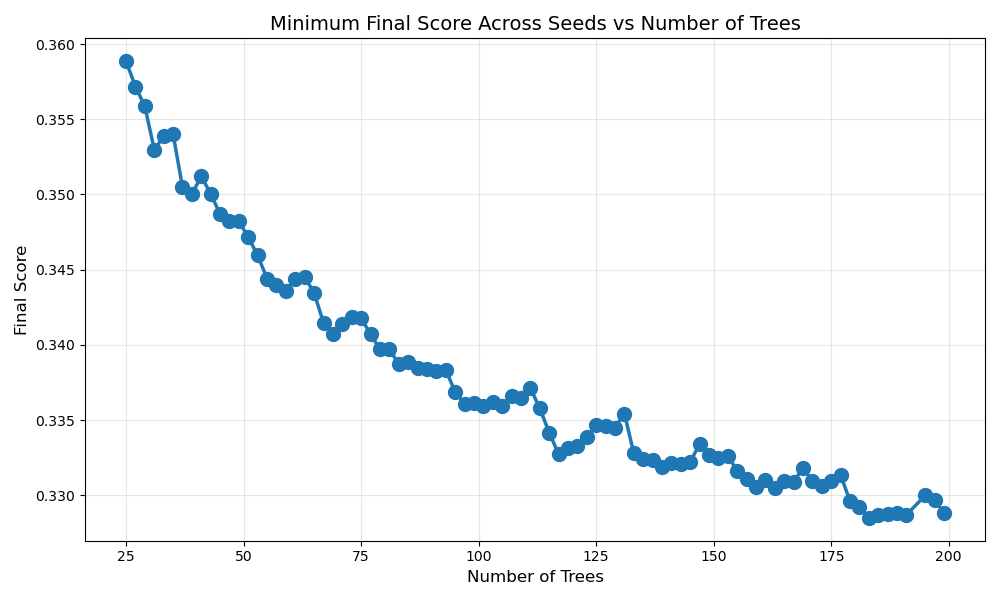

In [4]:
%matplotlib widget
# Minimum score across seeds for each N_trees
plt.figure(figsize=(10, 6))
def plot_seeds(seeds):
    if all_N_trees:
        min_scores = []
        for n in all_N_trees:
            scores_for_n = [seed_scores[seed][n] for seed in seeds if n in seed_scores[seed]]
            if scores_for_n:
                min_scores.append(min(scores_for_n))
        
        
        plt.plot(all_N_trees, min_scores, marker='o', linestyle='-', linewidth=2.5, 
                markersize=10, label='Minimum Score (Best Seed)')
        
        plt.xlabel('Number of Trees', fontsize=12)
        plt.ylabel('Final Score', fontsize=12)
        plt.title('Minimum Final Score Across Seeds vs Number of Trees', fontsize=14)
        #plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        #plt.show()

    print(np.sum(min_scores))
plot_seeds(SEEDS_TO_DO)
SEEDS_TO_DO_COPY = SEEDS_TO_DO.copy()
SEEDS_TO_DO_COPY.remove(130)
#SEEDS_TO_DO_COPY.remove(121)
plot_seeds(SEEDS_TO_DO_COPY)


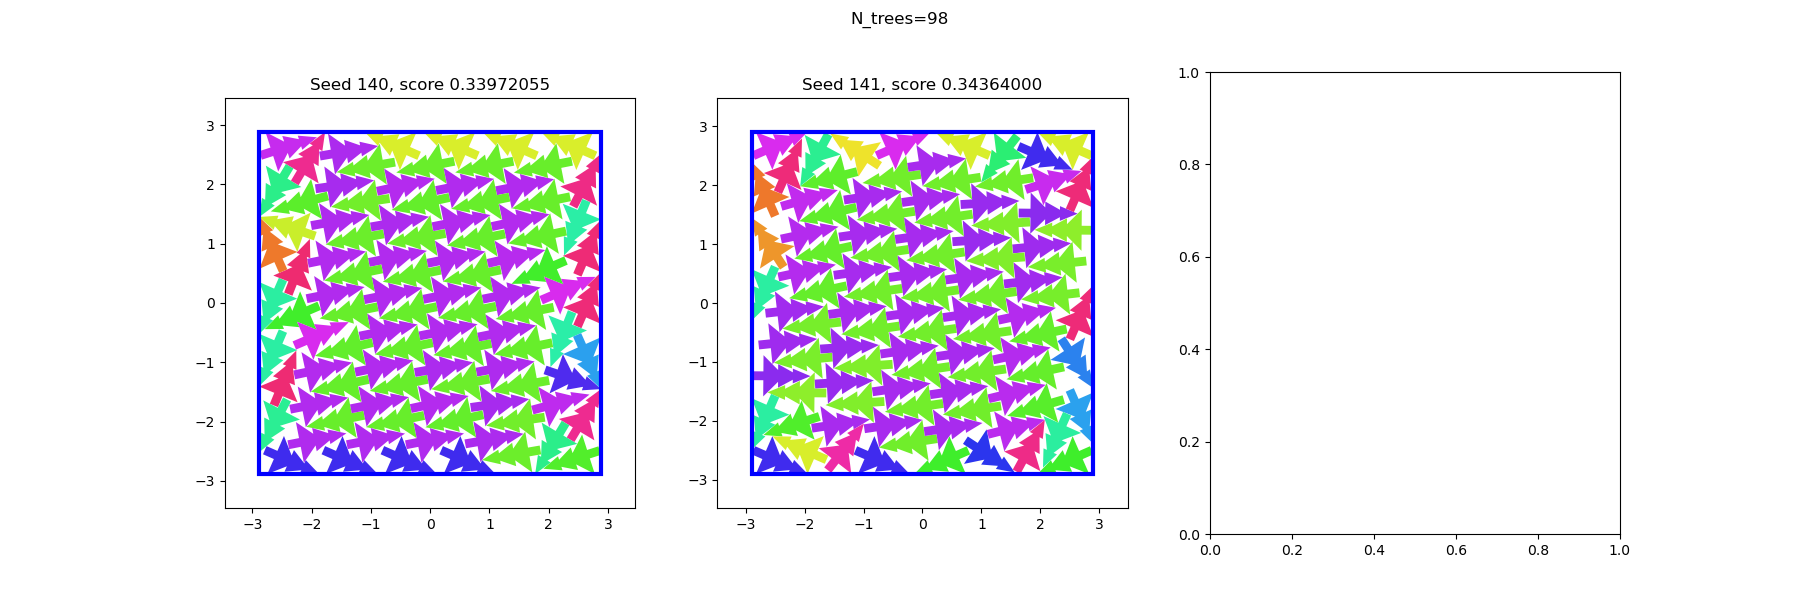

In [ ]:
for N_trees in [98]:
    seeds = [140,141]
    res = []
    for s in seeds:
        f = kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_seed{s}_done.pickle'
        try:
            dat = kgs.dill_load(f)
            res.append(dat.ga.champions[0])
        except Exception as e:
            res.append(None)
    _,ax = plt.subplots(1,3, figsize=(18,6))
    for i,r in enumerate(res):
        if not r is None:
            plt.sca(ax[i])
            pack_vis_sol.pack_vis_sol(r.phenotype, ax=ax[i])
            plt.title(f'Seed {seeds[i]}, score {r.phenotype.h[0,0].get()**2/N_trees:.8f}')
    plt.suptitle(f'N_trees={N_trees}')
    plt.pause(0.001)

In [ ]:
# dat = kgs.dill_load(kgs.temp_dir + f'/controller_runs/done/ga_N25_seed87_done.pickle')
# dat.ga.diagnostic_plots(-1,None)

In [ ]:
2

2